<b> Color Spaces Segmentation </b>

Given an RGB image, we first convert the color space to HSV (Hue Saturation Value). The reason for this is : 

(i) Hue : Gives only color information (based on degrees, where red falls between 0 to 60, yellow falls between 61 to 120, etc).

(ii) Value : The darkness / brightness of the color.

(iii) Saturation : The amount of gray in the image. If this value is 0%, it produces a faded effect and produces more white. On the other hand, if the value is 100%, we get the primary color itself.

If we are able to retrieve the Hue value alone from a given HSV image, we can segment the objects based on just the color information, disregarding the shade / brightness of the *same* color present in several objects over the scene.

HSV Color map for reference:

![]('../data/infographics/hsv_colormap.png')

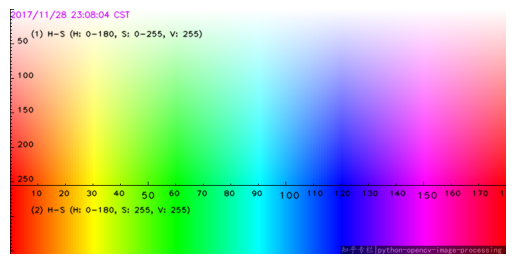

In [58]:

import numpy as np
import cv2 
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(cv2.imread('../data/infographics/hsv_colormap.png'), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

RGB image


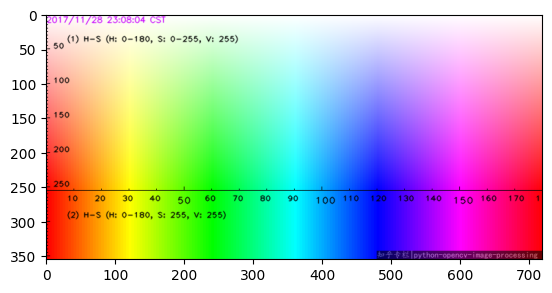

HSV image


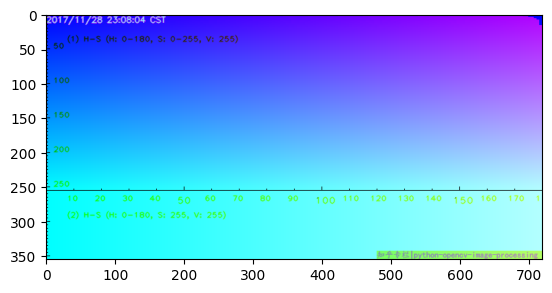

In [59]:
#image = cv2.imread('../data/car_camera_test.jpg')
image = cv2.imread('../data/infographics/hsv_colormap.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

print('RGB image')
plt.imshow(image)
plt.show()

print('HSV image')
plt.imshow(hsv_image, cmap='hsv')
plt.show()

red 
 mask -> hsv res blurred -> original image


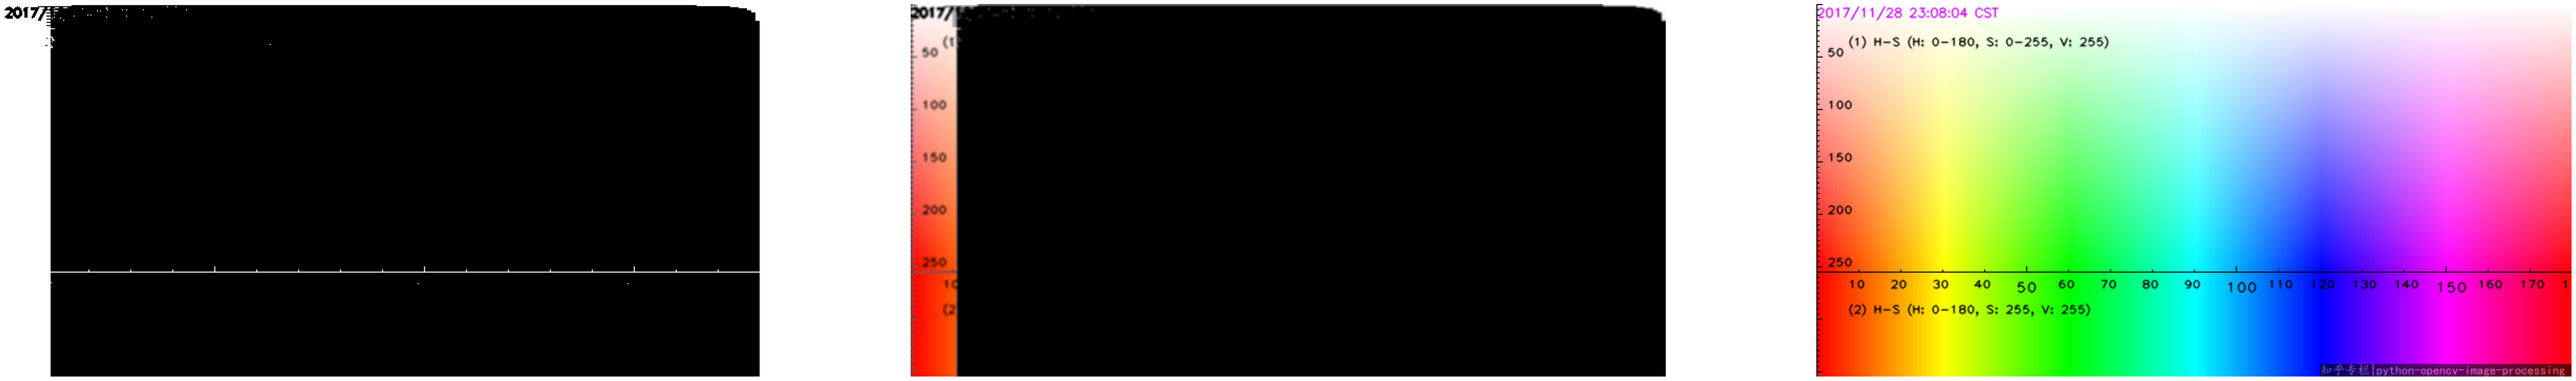

orange 
 mask -> hsv res blurred -> original image


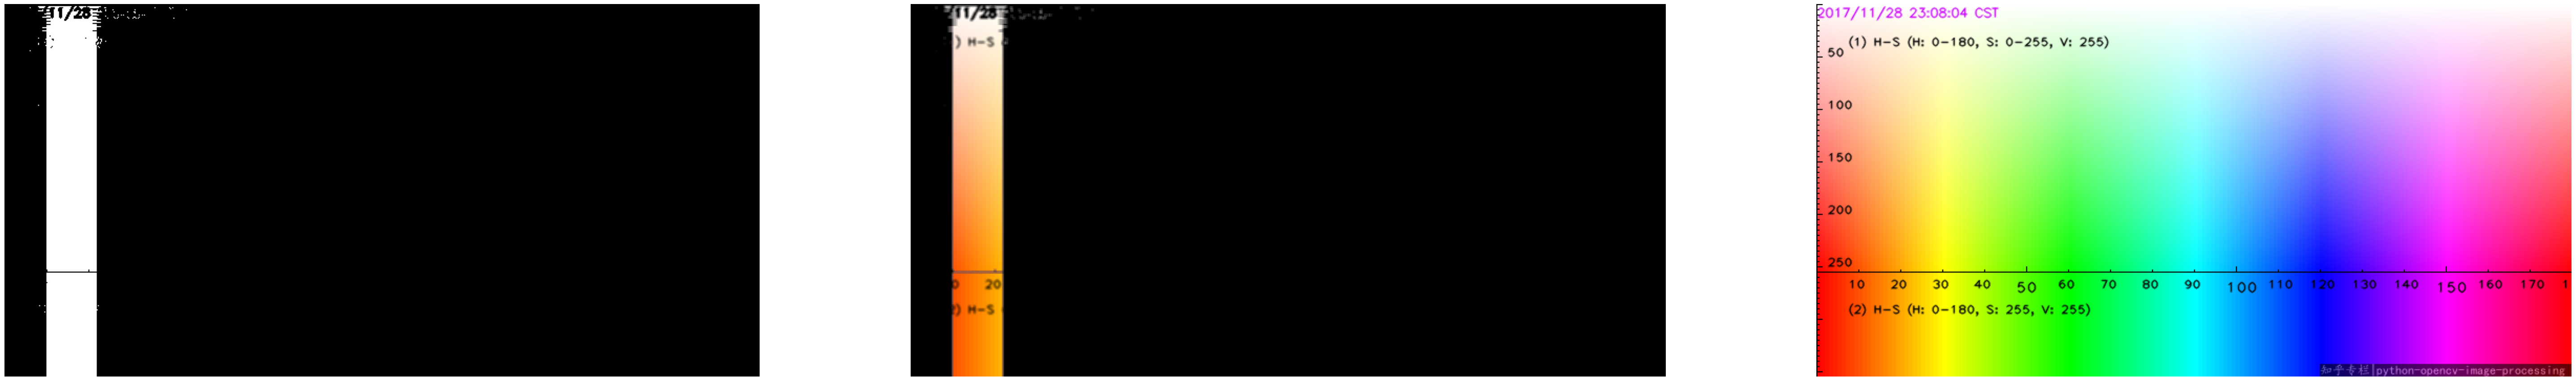

yellow 
 mask -> hsv res blurred -> original image


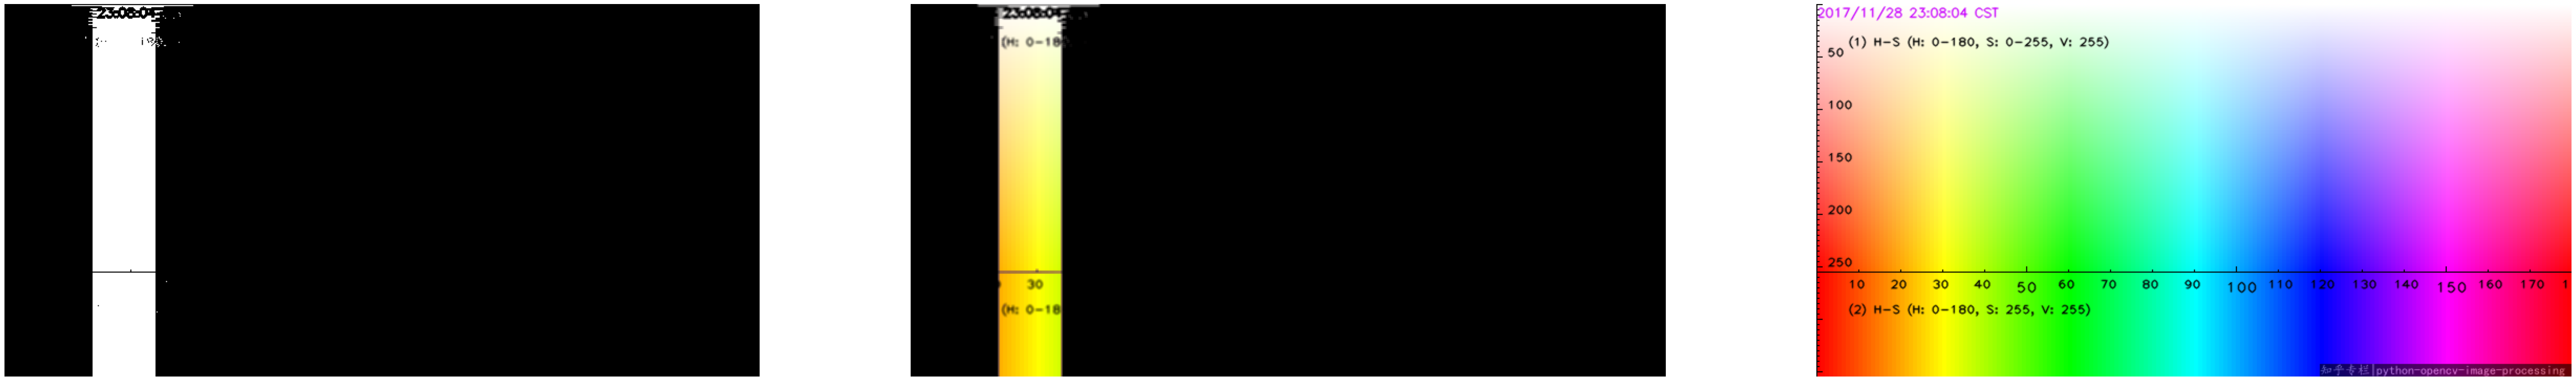

green 
 mask -> hsv res blurred -> original image


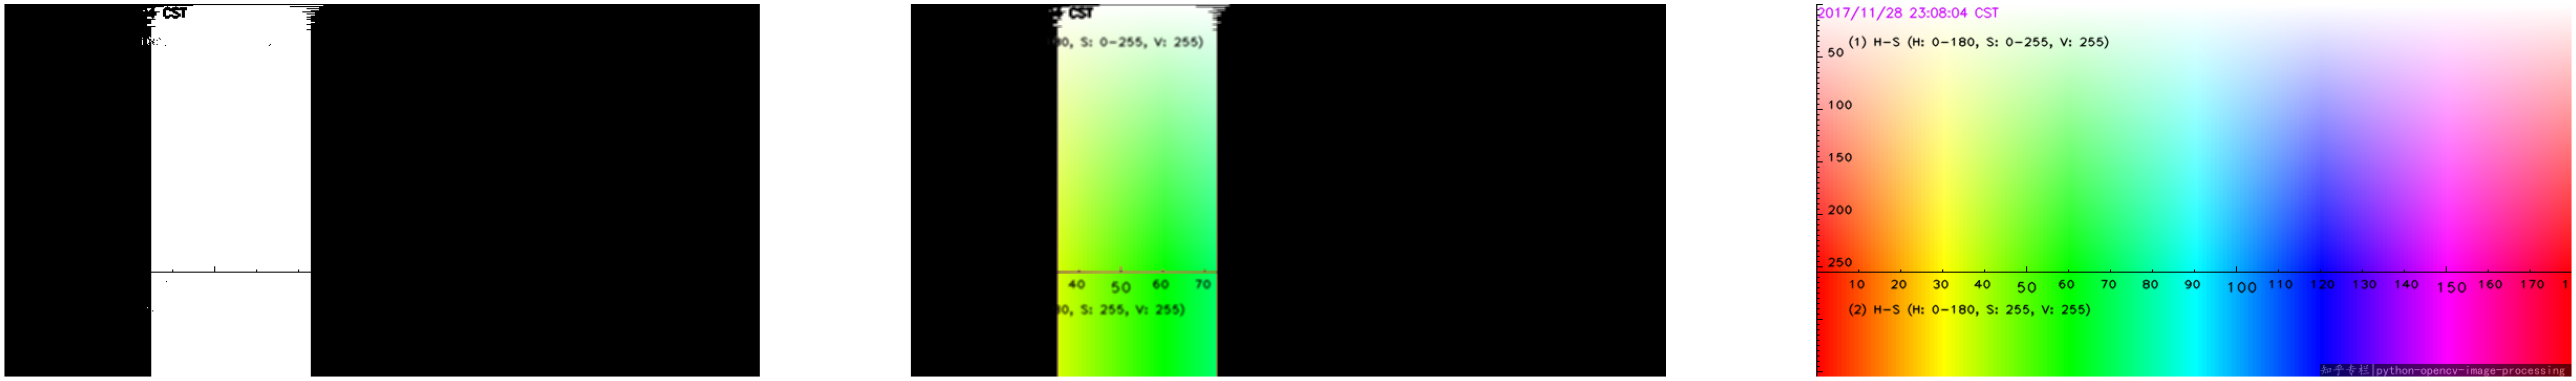

green - light blue / cyan 
 mask -> hsv res blurred -> original image


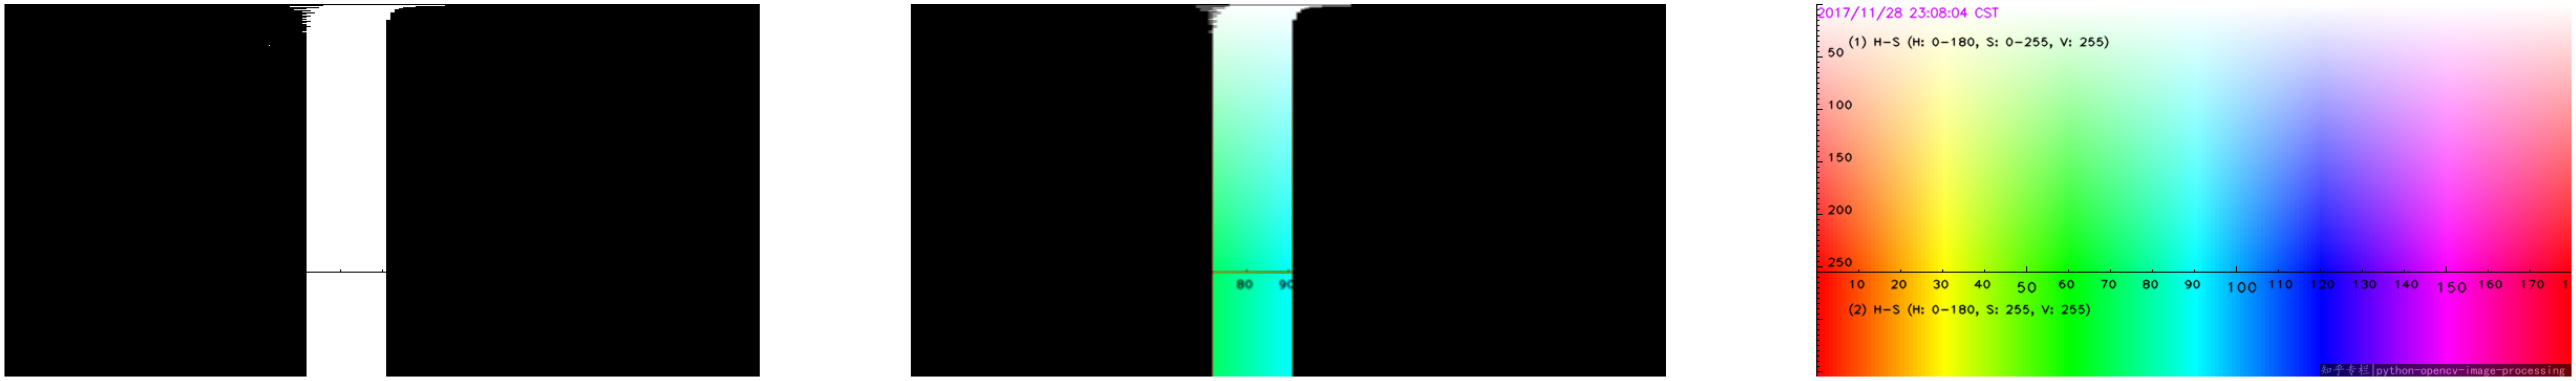

dark blue 
 mask -> hsv res blurred -> original image


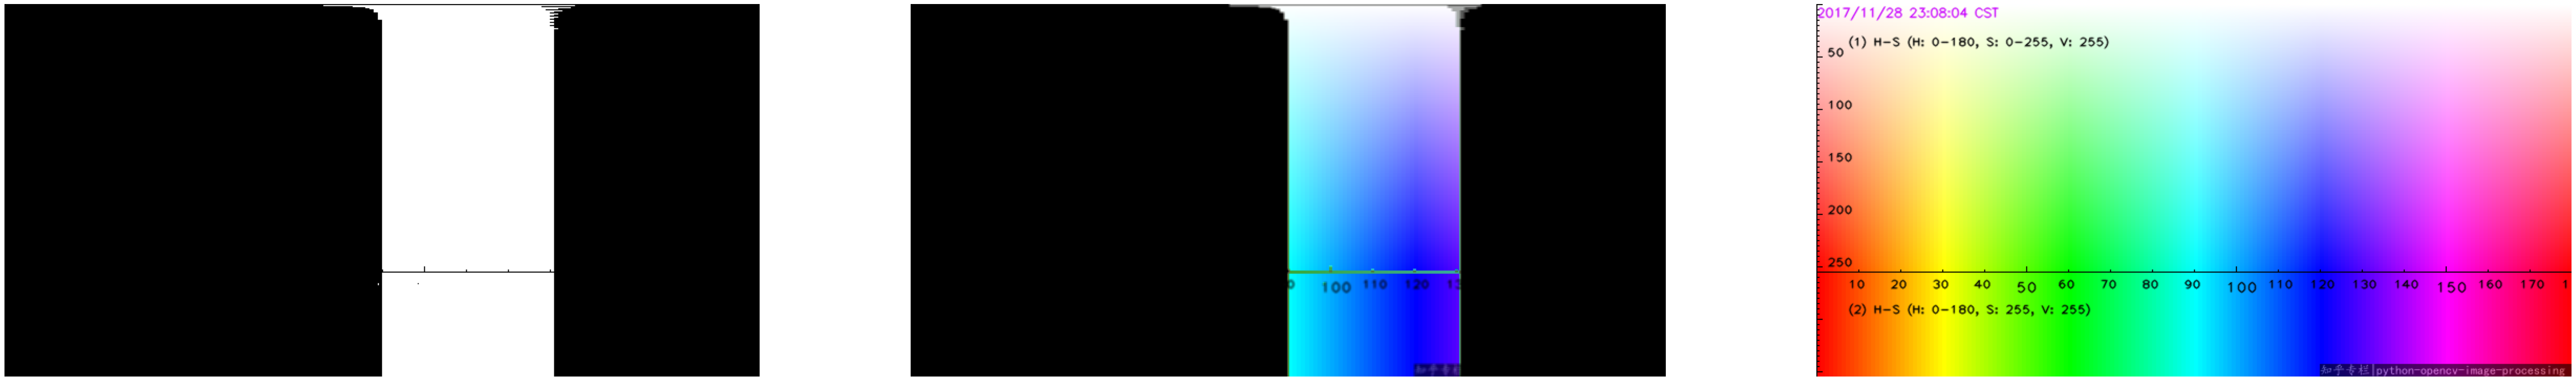

purple 
 mask -> hsv res blurred -> original image


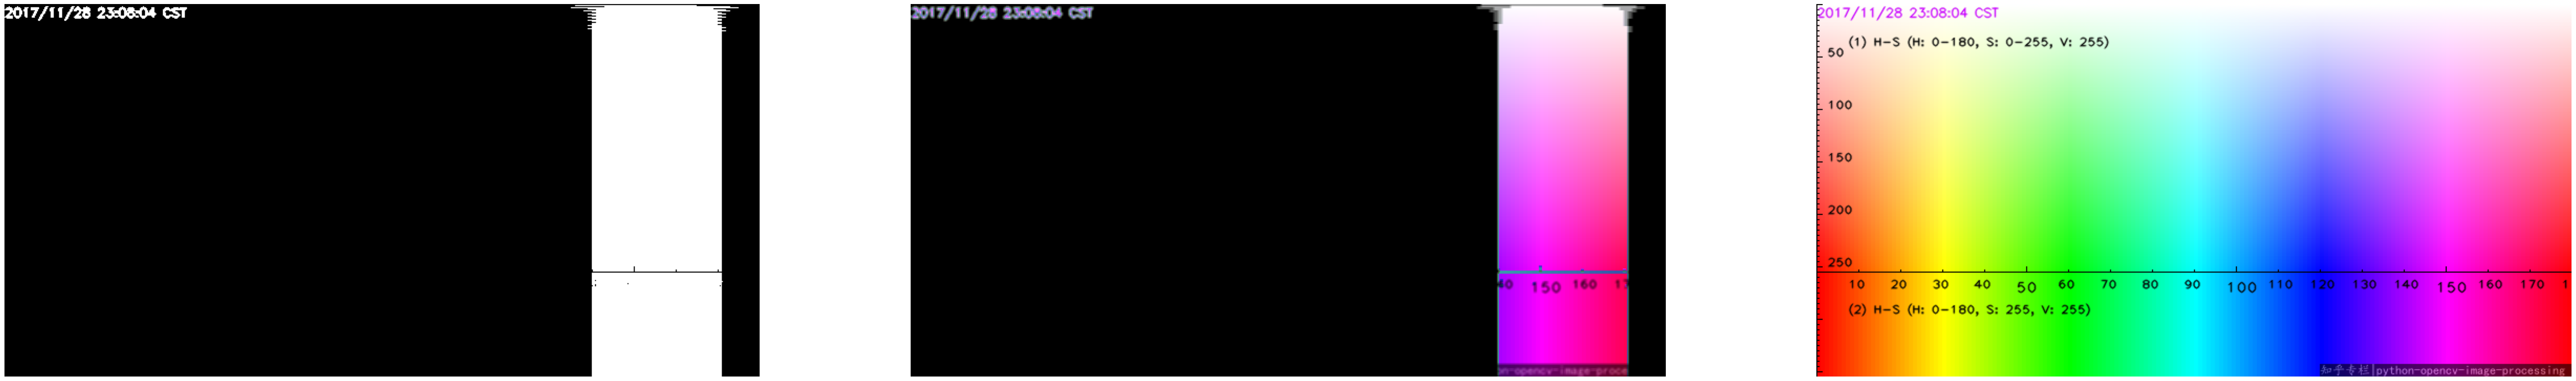

red 
 mask -> hsv res blurred -> original image


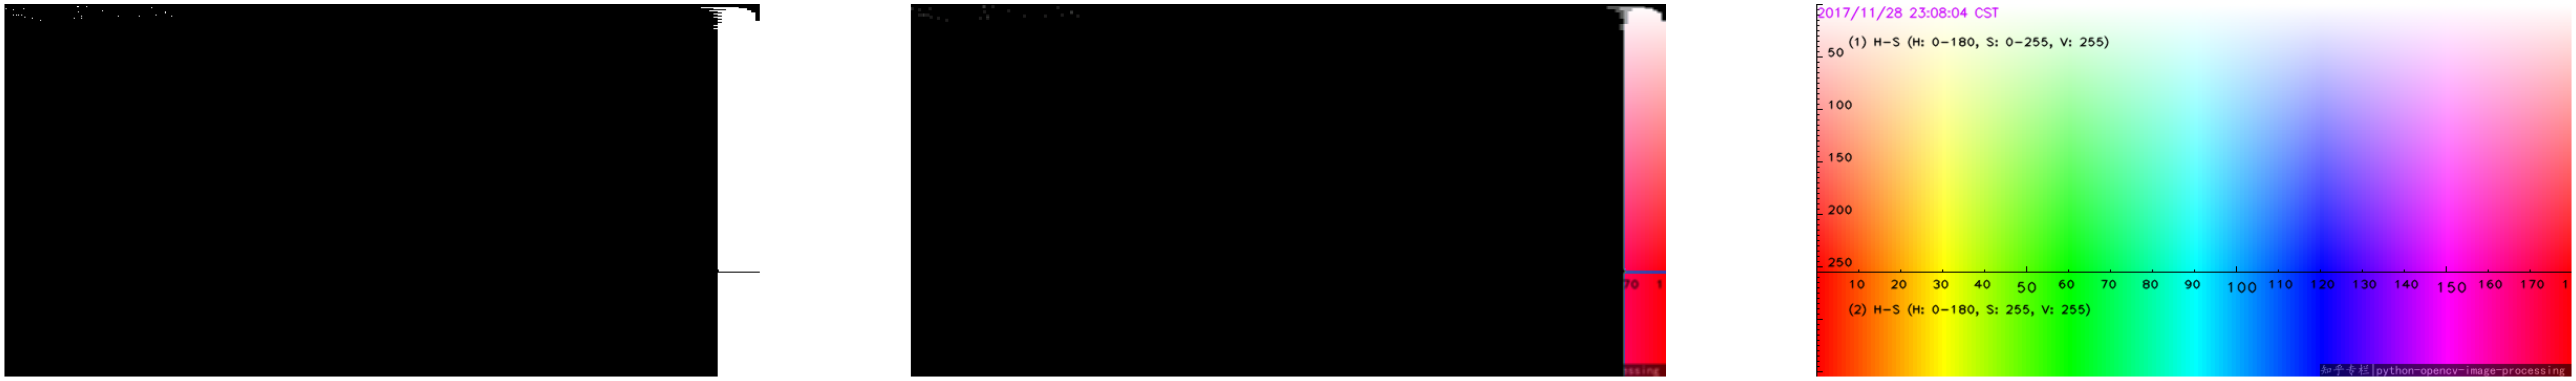

In [79]:
upper_saturation = 255
upper_value = 255

lower_saturation = 0
lower_value = 0

ranges_names = ['red', 'orange', 'yellow', 'green', 'green - light blue / cyan', 'dark blue', 'purple', 'red']

hue_ranges =   [[0,10],[10,21],[21,35],    [35,72],  [72,90],      [90,130],   [140,170], [170,180]]

for i in range(len(hue_ranges)):
    lower_hue = hue_ranges[i][0]
    upper_hue = hue_ranges[i][1]
    
    # Color range in HSV color space
    upper_hsv = np.array([upper_hue, upper_saturation, upper_value])
    lower_hsv = np.array([lower_hue, lower_saturation, lower_value])

    mask = cv2.inRange(hsv_image, lower_hsv, upper_hsv)
    hsv_segmentation_res = cv2.bitwise_and(hsv_image, hsv_image, mask=mask)
    hsv_segmentation_blurred = cv2.blur(hsv_segmentation_res, (3,3))

    print(ranges_names[i], '\n', 'mask -> hsv res blurred -> original image')

    plt.figure(figsize=(100,100))
    plt.subplot(1,4,1)
    plt.imshow(mask, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,4,2)
    plt.imshow(cv2.cvtColor(hsv_segmentation_blurred, cv2.COLOR_HSV2RGB), cmap='hsv')
    plt.axis('off')

    plt.subplot(1,4,3)
    plt.imshow(image)
    plt.axis('off')

    plt.show()